In [1]:
####Replicate Dr. Carina Curto's work on CTLN's

import numpy as np
import matplotlib.pyplot as plt

In [39]:
#Threshold nonlinearity

def thresh(x):
    return np.maximum(x,np.zeros(len(x)))
    
class CTLN(): #combinatorial threshold linear networks
    
    def __init__(self, size, dt, duration):
        self.size = size
        self.steps = np.arange(0,duration+dt,dt)
        self.statehistory = np.zeros((size,len(self.steps)))
        self.stepnum = 0
        self.dt = dt
        #default settings for states, inputs, and biases
        self.states = np.ones(size)
        self.inputs = np.zeros((size,len(self.steps)))
        self.biases = np.ones(size)
        
    def setInputs(self,inputs):
        self.inputs = inputs
    
    def setWeights(self,connections,delta,epsilon): 
        #transforms the adjacency matrix (w/ 0s on diagonal) into the weight vector
        #delta >0
        #0<epsilon < delta/(delta+1)
        self.weights = np.zeros((self.size,self.size))
        for i in range(self.size):
            for j in range(self.size):
                if i!=j:
                    if connections[i,j] == 0:
                        self.weights[i,j] = -1 - delta
                    else: 
                        self.weights[i,j] = -1 + epsilon
    
    def setBiases(self,biases): #all biases must be positive
        self.biases = biases
    
    def initializeState(self, s):
        self.states = s
        
    def step(self):
        self.states += self.dt * (-self.states + thresh(np.dot(self.weights.T,self.states)+self.biases)+self.inputs[:,self.stepnum])
        
    def run(self):
        for i in self.steps:
            self.statehistory[:,self.stepnum] = self.states
            self.step()
            self.stepnum+=1
        
    def plot(self,iplot):
        for i in range(self.size):
            lab = "Neuron %d" %(i+1)
            plt.plot(self.steps,self.statehistory[i],label=lab)
        if iplot:
            for i in range(self.size):
                plt.plot(self.steps,self.inputs[i],label="Input %d" %(i+1))
        plt.title("Neural Activity")
        plt.xlabel("Time (s)")
        plt.ylabel("Firing Rate")
        plt.rcParams["figure.figsize"] = (20,3)
        plt.legend()
        plt.show()
    
    


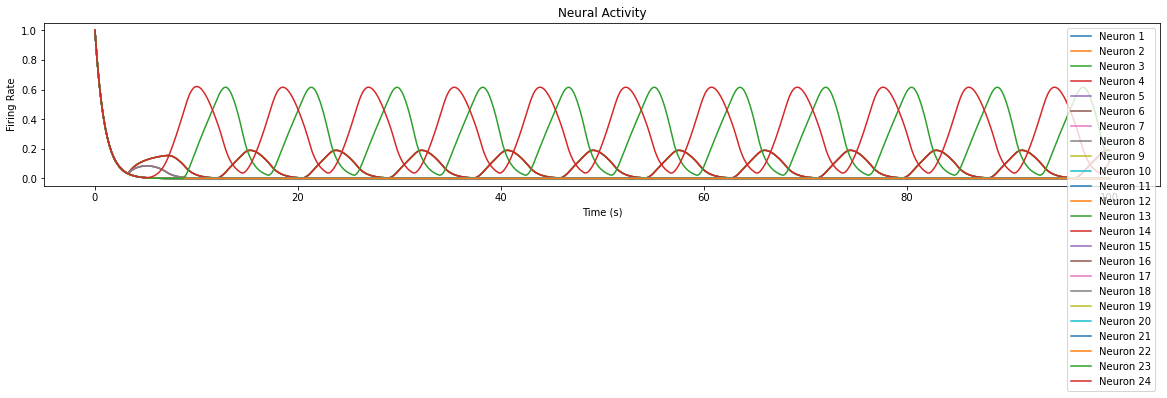

In [44]:
C = CTLN(24,.1,100)
delta = .5
epsilon = .25
#connections = np.array([[0,1,0,1,0],[0,0,1,0,0],[0,0,0,1,1],[0,0,0,0,1],[1,1,0,0,0]])  #example A
C.setWeights(connections,delta,epsilon)

neurontokick = 15

while i in range(len(C.steps)):
    if (i) % 2000 == 0:
        N.setInputs(np.ones()*1)
        #N.setInputs(np.array([1,0,0])*1)
    if (i+1000)%2000 == 0:
        N.setInputs(np.ones(3)*-1)
        #N.setInputs(np.array([1,0,0])*-1)
    if (i) % 1000 == 10:
        N.setInputs(np.zeros(3))

C.setInputs()
C.run()
C.plot(False)

In [42]:
#multi-gait network
connections = np.array([
    [0,1,0,1,1,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1],
    [1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,1],
    [0,1,0,1,1,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1],
    [1,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1],
    [1,0,1,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0],
    [0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,0],
    [1,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0],
    [0,1,0,1,1,0,1,0,0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,0],
    [1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
    [0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
    [0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
    [0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
    [0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]])

In [16]:
#could (a simpler version of) this be evolved/developed? the criteria being to exhibit multiple gaits upon kicking. But what types of kicking

[1 2]


In [ ]:
#"even ones the horse can't do" is there a way to restrict this to only the ones the horse can do without allowing others?
#canalizing